In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import median_abs_deviation
import random
from sklearn.preprocessing import robust_scale
from sklearn import metrics

In [2]:
# Load the data
df= pd.read_excel('Data_Pathrise.xlsx')
# Delete leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [3]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

<Axes: >

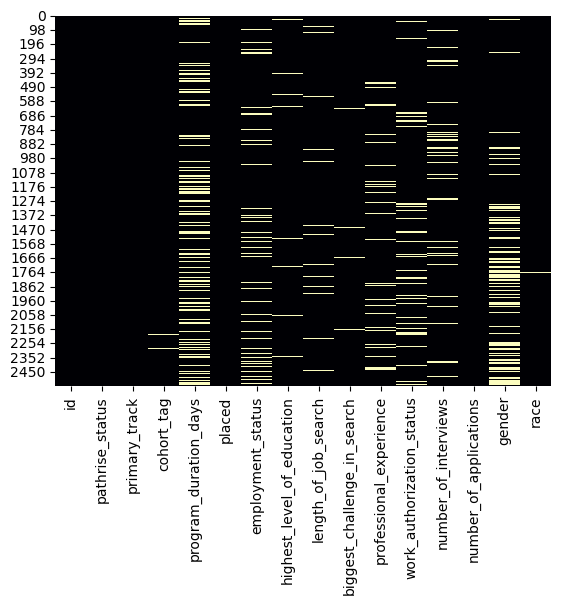

In [5]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

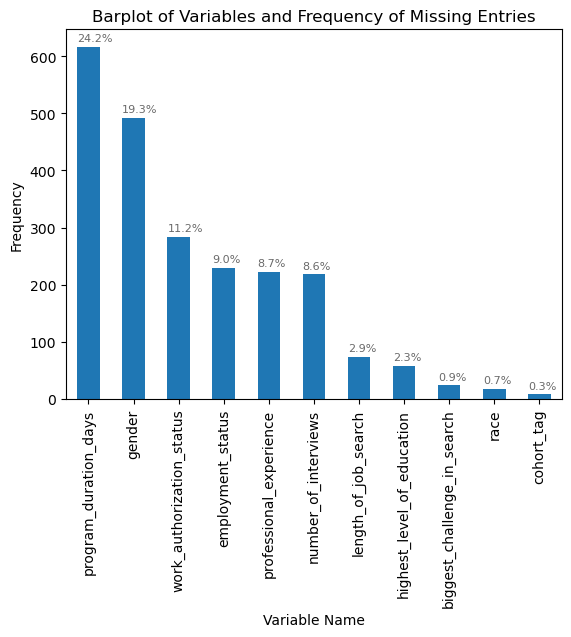

In [7]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
ax = missing.plot(kind='bar')
ax.set_alpha(0.8)
ax.set_title("Barplot of Variables and Frequency of Missing Entries")
ax.set_ylabel("Frequency")
ax.set_xlabel('Variable Name')


for i in ax.patches:

     ax.text(i.get_x(), i.get_height() + 10, \
            str(round((i.get_height()/len(df))*100, 1))+'%', fontsize=8,
                color='dimgrey')

In [4]:
def impute_missing_with_variation(df, column):
    # Calculate median and mean deviation
    median_value = df[column].median()
    deviation = np.abs(df[column] - median_value)
    mean_deviation = np.mean(deviation)

    # Impute missing values using median + random deviation
    missing_indices = df[column].isnull()
    num_missing = missing_indices.sum()

    random_deviations = np.random.uniform(low=-mean_deviation, high=mean_deviation, size=num_missing)
    imputed_values = median_value + random_deviations

    # Assign imputed values to missing entries
    df.loc[missing_indices, column] = imputed_values

In [5]:
df.dropna(subset=['cohort_tag'], inplace=True)
df['cohort_tag'] = df.cohort_tag.apply(lambda x: x[3:5])
df['entrance_year'] = df['cohort_tag'].apply(int).apply(lambda x: x+2000)
df['entrance_year'].value_counts()

entrance_year
2019    1422
2018     750
2020     362
2021       2
Name: count, dtype: int64

In [6]:
df.drop(columns=['id','cohort_tag'],axis=1,inplace=True)

<Axes: xlabel='entrance_year', ylabel='count'>

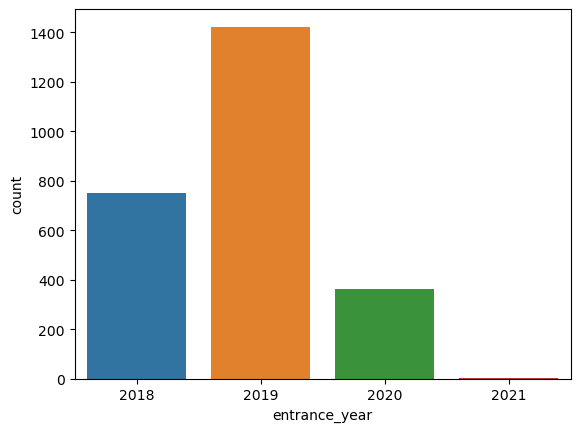

In [7]:
sns.countplot(x='entrance_year', data=df)

In [11]:
df.columns

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'entrance_year'],
      dtype='object')

In [12]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days          614
placed                           0
employment_status              228
highest_level_of_education      58
length_of_job_search            73
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      283
number_of_interviews           214
number_of_applications           0
gender                         489
race                            18
entrance_year                    0
dtype: int64

C:\Users\Vida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


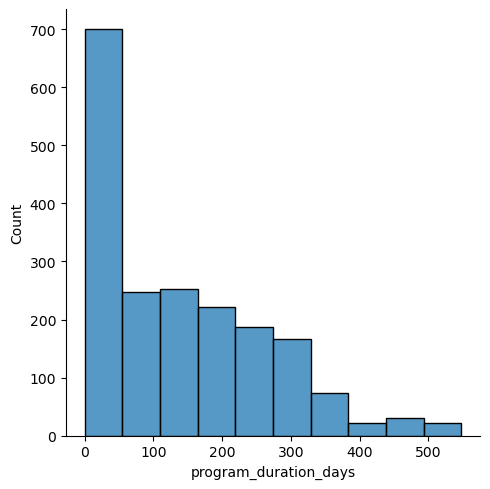

In [13]:
sns.displot(x='program_duration_days', data=df,bins=10)

In [14]:
impute_missing_with_variation(df,'program_duration_days')

C:\Users\Vida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


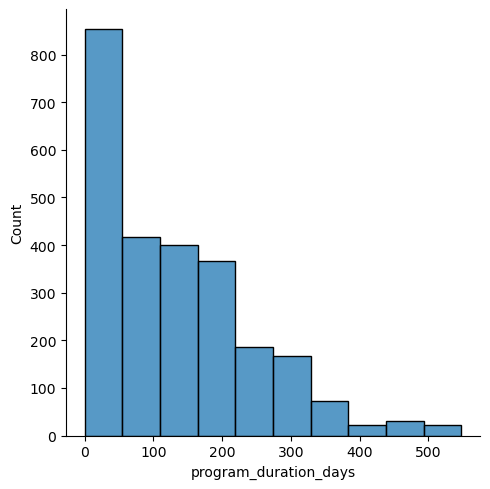

In [15]:
sns.displot(x='program_duration_days', data=df,bins=10)

In [16]:
df['program_duration_days'] = df['program_duration_days'].apply(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2536 non-null   object 
 1   primary_track                2536 non-null   object 
 2   program_duration_days        2536 non-null   int64  
 3   placed                       2536 non-null   int64  
 4   employment_status            2308 non-null   object 
 5   highest_level_of_education   2478 non-null   object 
 6   length_of_job_search         2463 non-null   object 
 7   biggest_challenge_in_search  2512 non-null   object 
 8   professional_experience      2314 non-null   object 
 9   work_authorization_status    2253 non-null   object 
 10  number_of_interviews         2322 non-null   float64
 11  number_of_applications       2536 non-null   int64  
 12  gender                       2047 non-null   object 
 13  race                   

In [18]:
set(df['employment_status'])

{'Contractor',
 'Employed Full-Time',
 'Employed Part-Time',
 'Student',
 'Unemployed',
 nan}

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Employed Part-Time'),
  Text(2, 0, 'Contractor'),
  Text(3, 0, 'Employed Full-Time'),
  Text(4, 0, 'Student')])

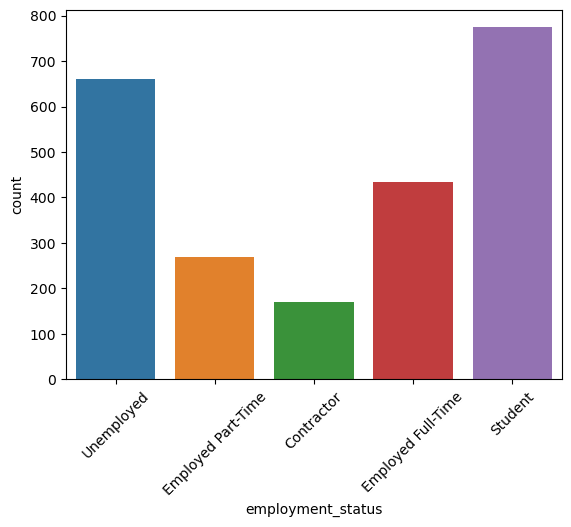

In [19]:
sns.countplot(x='employment_status', data=df)
plt.xticks(rotation=45)

In [20]:
# Impute missing values using mode
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace=True)

In [21]:
set(df['employment_status'])

{'Contractor',
 'Employed Full-Time',
 'Employed Part-Time',
 'Student',
 'Unemployed'}

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Employed Part-Time'),
  Text(2, 0, 'Contractor'),
  Text(3, 0, 'Employed Full-Time'),
  Text(4, 0, 'Student')])

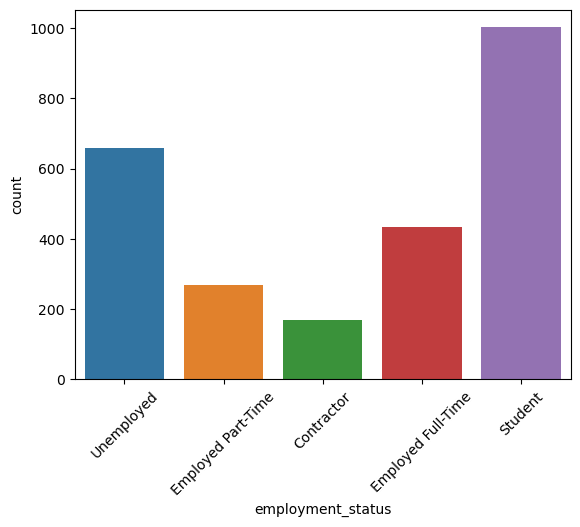

In [22]:
sns.countplot(x='employment_status', data=df)
plt.xticks(rotation=45)

In [23]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education      58
length_of_job_search            73
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      283
number_of_interviews           214
number_of_applications           0
gender                         489
race                            18
entrance_year                    0
dtype: int64

In [24]:
# Impute missing values in highest_level_of_education using mode
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0], inplace=True)

C:\Users\Vida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


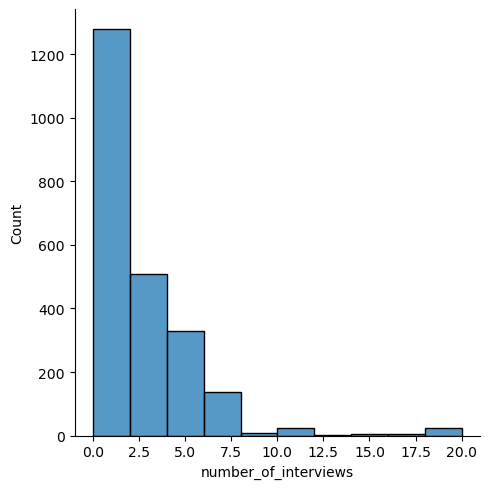

In [25]:
sns.displot(x='number_of_interviews', data=df,bins=10)

In [26]:
impute_missing_with_variation(df,'number_of_interviews')

In [27]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            73
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      283
number_of_interviews             0
number_of_applications           0
gender                         489
race                            18
entrance_year                    0
dtype: int64

C:\Users\Vida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


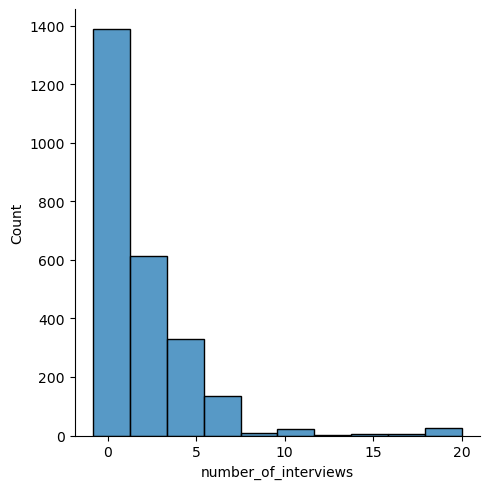

In [28]:
sns.displot(x='number_of_interviews', data=df,bins=10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2536 non-null   object 
 1   primary_track                2536 non-null   object 
 2   program_duration_days        2536 non-null   int64  
 3   placed                       2536 non-null   int64  
 4   employment_status            2536 non-null   object 
 5   highest_level_of_education   2536 non-null   object 
 6   length_of_job_search         2463 non-null   object 
 7   biggest_challenge_in_search  2512 non-null   object 
 8   professional_experience      2314 non-null   object 
 9   work_authorization_status    2253 non-null   object 
 10  number_of_interviews         2536 non-null   float64
 11  number_of_applications       2536 non-null   int64  
 12  gender                       2047 non-null   object 
 13  race                   

In [30]:
df.dropna(subset=['race'], inplace=True)

In [31]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            71
biggest_challenge_in_search     24
professional_experience        218
work_authorization_status      282
number_of_interviews             0
number_of_applications           0
gender                         485
race                             0
entrance_year                    0
dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Decline to Self Identify'),
  Text(3, 0, 'Non-Binary')])

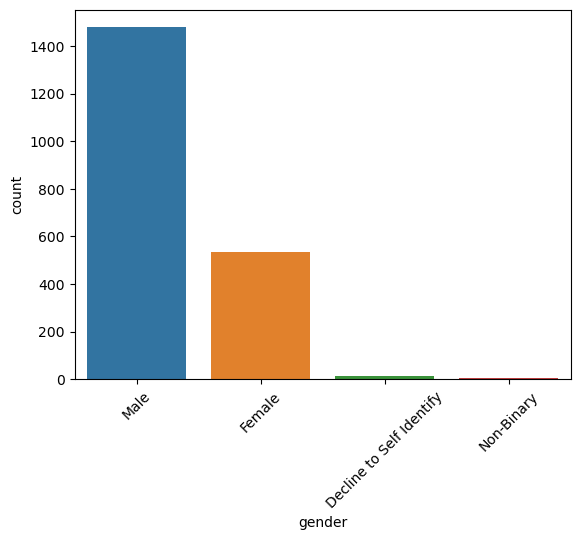

In [32]:
sns.countplot(x='gender', data=df)
plt.xticks(rotation=45)

In [33]:
df['gender'].fillna('Unknown', inplace=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Decline to Self Identify'),
  Text(4, 0, 'Non-Binary')])

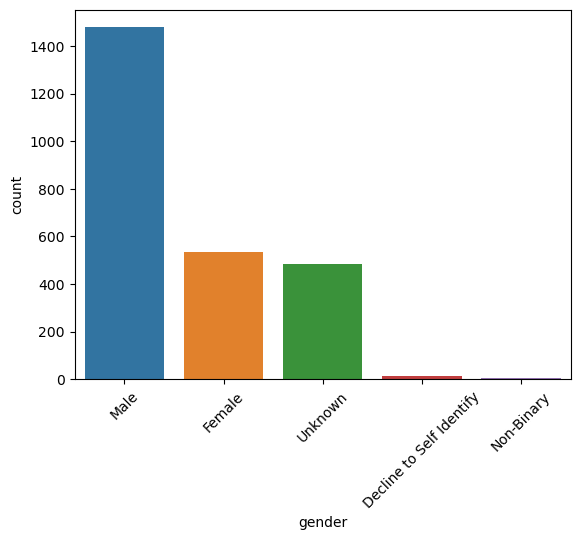

In [34]:
sns.countplot(x='gender', data=df)
plt.xticks(rotation=45)

In [35]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            71
biggest_challenge_in_search     24
professional_experience        218
work_authorization_status      282
number_of_interviews             0
number_of_applications           0
gender                           0
race                             0
entrance_year                    0
dtype: int64

In [36]:
df['work_authorization_status']

0       Canada Citizen
1              Citizen
2              Citizen
3              Citizen
4          F1 Visa/OPT
             ...      
2539           Citizen
2540       F1 Visa/OPT
2541           Citizen
2542           Citizen
2543        Green Card
Name: work_authorization_status, Length: 2518, dtype: object

In [37]:
df.dropna(subset=['biggest_challenge_in_search'], inplace=True)

In [38]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            71
biggest_challenge_in_search      0
professional_experience        214
work_authorization_status      277
number_of_interviews             0
number_of_applications           0
gender                           0
race                             0
entrance_year                    0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hearing back on my applications'),
  Text(1, 0, 'Getting past final round interviews'),
  Text(2, 0, 'Figuring out which jobs to apply for'),
  Text(3, 0, 'Technical interviewing'),
  Text(4, 0, 'Getting past phone screens'),
  Text(5, 0, 'Lack of relevant experience'),
  Text(6, 0, 'Technical skills'),
  Text(7, 0, 'Getting past mid-stage interviews'),
  Text(8, 0, 'Behavioral interviewing'),
  Text(9, 0, 'Resume gap')])

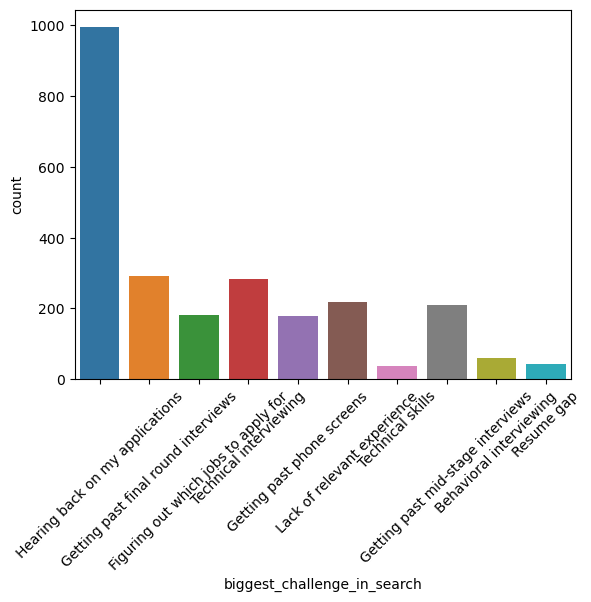

In [39]:
sns.countplot(x='biggest_challenge_in_search', data=df)
plt.xticks(rotation=45)

In [40]:
df.columns

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'entrance_year'],
      dtype='object')

In [41]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            71
biggest_challenge_in_search      0
professional_experience        214
work_authorization_status      277
number_of_interviews             0
number_of_applications           0
gender                           0
race                             0
entrance_year                    0
dtype: int64

In [42]:
df.columns

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'entrance_year'],
      dtype='object')

C:\Users\Vida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3],
 [Text(0, 0, '3-4 years'),
  Text(1, 0, '1-2 years'),
  Text(2, 0, 'Less than one year'),
  Text(3, 0, '5+ years')])

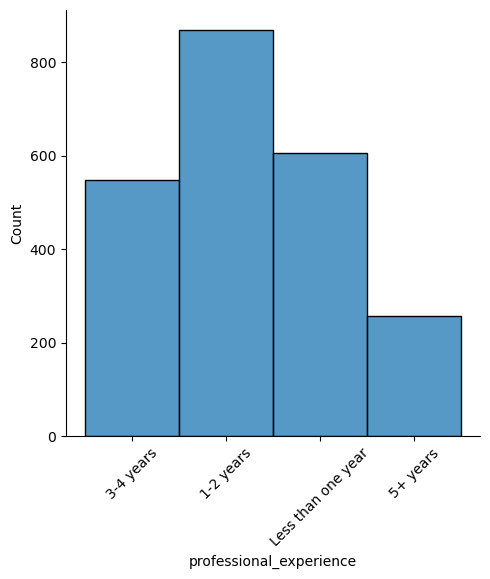

In [43]:
sns.displot(x='professional_experience', data = df)
plt.xticks(rotation=45)

In [44]:
df['professional_experience'].value_counts()

professional_experience
1-2 years             868
Less than one year    606
3-4 years             548
5+ years              258
Name: count, dtype: int64

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming df is your DataFrame
# Select columns to be used for imputation (both numerical and categorical)
imputation_features = ['placed', 'program_duration_days']

# Create a DataFrame for imputation without missing values in 'professional_experience'
imputation_data = df.dropna(subset=['professional_experience'])

# Select columns for KNN classification
X = imputation_data[imputation_features]
y = imputation_data['professional_experience']

# Initialize K-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the K-NN classifier
knn_classifier.fit(X, y)

# Data to be imputed (rows with missing 'professional_experience')
missing_data = df[df['professional_experience'].isnull()]

# Select features for missing data
X_missing = missing_data[imputation_features]

# Predict missing values using K-NN classification
imputed_values = knn_classifier.predict(X_missing)

# Update the DataFrame with imputed values
df.loc[df['professional_experience'].isnull(), 'professional_experience'] = imputed_values


In [46]:
df['professional_experience'].value_counts()

professional_experience
1-2 years             987
Less than one year    659
3-4 years             581
5+ years              267
Name: count, dtype: int64

In [47]:
df.dropna(subset='length_of_job_search', inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2423 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2423 non-null   object 
 1   primary_track                2423 non-null   object 
 2   program_duration_days        2423 non-null   int64  
 3   placed                       2423 non-null   int64  
 4   employment_status            2423 non-null   object 
 5   highest_level_of_education   2423 non-null   object 
 6   length_of_job_search         2423 non-null   object 
 7   biggest_challenge_in_search  2423 non-null   object 
 8   professional_experience      2423 non-null   object 
 9   work_authorization_status    2155 non-null   object 
 10  number_of_interviews         2423 non-null   float64
 11  number_of_applications       2423 non-null   int64  
 12  gender                       2423 non-null   object 
 13  race                   

In [49]:
df['work_authorization_status'].value_counts()

work_authorization_status
Citizen           1049
F1 Visa/OPT        618
Green Card         175
F1 Visa/CPT        128
Other              107
H1B                 43
Canada Citizen      23
STEM OPT             8
Not Authorized       4
Name: count, dtype: int64

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming df is your DataFrame
# Select columns to be used for imputation (both numerical and categorical)
imputation_features = ['placed', 'program_duration_days']

# Create a DataFrame for imputation without missing values in 'professional_experience'
imputation_data = df.dropna(subset=['work_authorization_status'])

# Select columns for KNN classification
X = imputation_data[imputation_features]
y = imputation_data['work_authorization_status']

# Initialize K-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the K-NN classifier
knn_classifier.fit(X, y)

# Data to be imputed (rows with missing 'professional_experience')
missing_data = df[df['work_authorization_status'].isnull()]

# Select features for missing data
X_missing = missing_data[imputation_features]

# Predict missing values using K-NN classification
imputed_values = knn_classifier.predict(X_missing)

# Update the DataFrame with imputed values
df.loc[df['work_authorization_status'].isnull(), 'work_authorization_status'] = imputed_values


In [51]:
df.isnull().sum()

pathrise_status                0
primary_track                  0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
entrance_year                  0
dtype: int64

In [52]:
df['number_of_interviews']= df['number_of_interviews'].apply(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2423 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2423 non-null   object
 1   primary_track                2423 non-null   object
 2   program_duration_days        2423 non-null   int64 
 3   placed                       2423 non-null   int64 
 4   employment_status            2423 non-null   object
 5   highest_level_of_education   2423 non-null   object
 6   length_of_job_search         2423 non-null   object
 7   biggest_challenge_in_search  2423 non-null   object
 8   professional_experience      2423 non-null   object
 9   work_authorization_status    2423 non-null   object
 10  number_of_interviews         2423 non-null   int64 
 11  number_of_applications       2423 non-null   int64 
 12  gender                       2423 non-null   object
 13  race                         2423 non-

In [58]:
filtered_data = df[df['number_of_interviews'] <= df['number_of_applications']]
filtered_data

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,entrance_year
0,Active,SWE,85,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2,900,Male,Non-Hispanic White or Euro-American,2019
2,Closed Lost,Design,0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0,0,Male,East Asian or Asian American,2019
3,Closed Lost,PSO,0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5,25,Male,Decline to Self Identify,2019
4,Placed,SWE,89,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10,100,Male,East Asian or Asian American,2019
5,Closed Lost,SWE,0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5,100,Male,East Asian or Asian American,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,Withdrawn (Failed),Design,457,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4,15,Male,Non-Hispanic White or Euro-American,2018
2540,Withdrawn (Failed),Data,488,0,Student,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1,7,Male,Non-Hispanic White or Euro-American,2019
2541,Active,SWE,205,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1,30,Female,Non-Hispanic White or Euro-American,2018
2542,Active,SWE,121,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2,10,Male,Decline to Self Identify,2018


In [59]:
count = len(df[df['number_of_interviews'] > df['number_of_applications']])

print("Number of rows with inconsistent number of interviews and applications:", count)

Number of rows with inconsistent number of interviews and applications: 112


filtered data

In [62]:
filtered_data.to_csv('filtered_data.csv', index=False)
data = pd.read_csv('filtered_data.csv')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2311 non-null   object
 1   primary_track                2311 non-null   object
 2   program_duration_days        2311 non-null   int64 
 3   placed                       2311 non-null   int64 
 4   employment_status            2311 non-null   object
 5   highest_level_of_education   2311 non-null   object
 6   length_of_job_search         2311 non-null   object
 7   biggest_challenge_in_search  2311 non-null   object
 8   professional_experience      2311 non-null   object
 9   work_authorization_status    2311 non-null   object
 10  number_of_interviews         2311 non-null   int64 
 11  number_of_applications       2311 non-null   int64 
 12  gender                       2311 non-null   object
 13  race                         2311

Cleaned Data

In [54]:
df.to_csv('cleaned_df.csv', index=False)

In [61]:
cleaned_df = pd.read_csv('cleaned_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'filter_df.csv'

In [56]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2423 non-null   object
 1   primary_track                2423 non-null   object
 2   program_duration_days        2423 non-null   int64 
 3   placed                       2423 non-null   int64 
 4   employment_status            2423 non-null   object
 5   highest_level_of_education   2423 non-null   object
 6   length_of_job_search         2423 non-null   object
 7   biggest_challenge_in_search  2423 non-null   object
 8   professional_experience      2423 non-null   object
 9   work_authorization_status    2423 non-null   object
 10  number_of_interviews         2423 non-null   int64 
 11  number_of_applications       2423 non-null   int64 
 12  gender                       2423 non-null   object
 13  race                         2423

EDA


In [62]:
# Assuming 'data' is your DataFrame and you want correlations for specific numeric columns
numeric_columns = ['program_duration_days', 'placed', 'number_of_interviews', 'number_of_applications', 'entrance_year']

correlation_matrix = df[numeric_columns].corr()

In [63]:
correlation_matrix

,program_duration_days,placed,number_of_interviews,number_of_applications,entrance_year
program_duration_days,1.000000,0.214193,-0.052250,-0.053002,-0.199341
placed,0.214193,1.000000,0.000469,-0.026061,-0.201745
number_of_interviews,-0.052250,0.000469,1.000000,0.053373,-0.004689
number_of_applications,-0.053002,-0.026061,0.053373,1.000000,-0.006496
entrance_year,-0.199341,-0.201745,-0.004689,-0.006496,1.000000


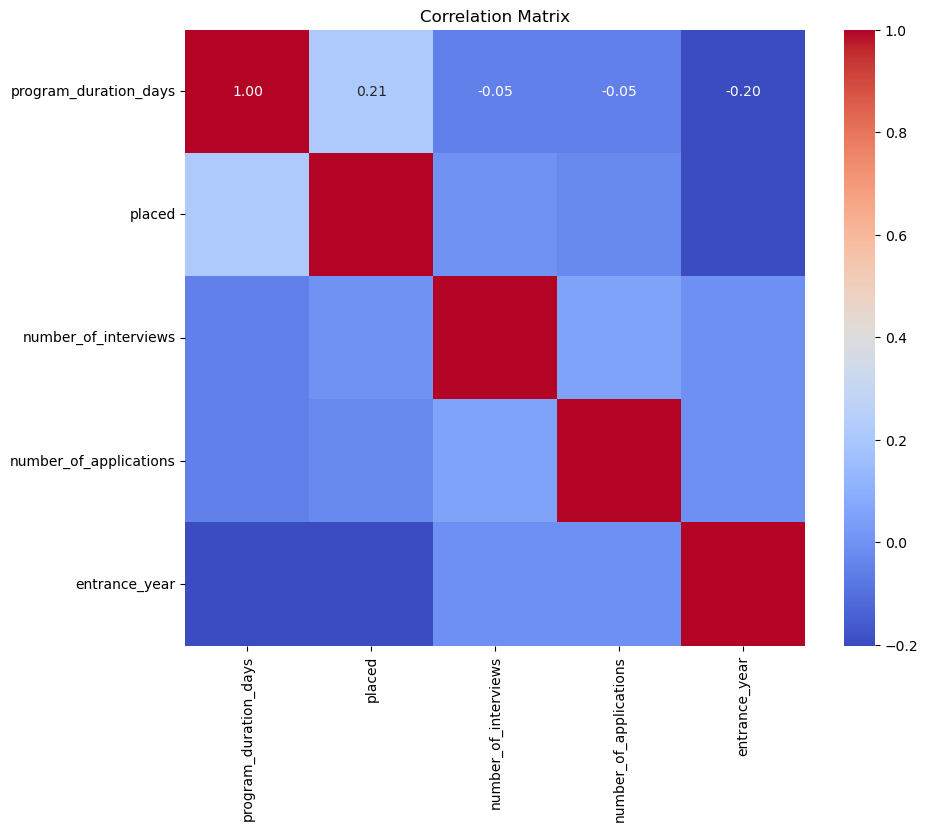

In [65]:
# Assuming you have already computed the correlation matrix as 'correlation_matrix'
# Use the following code to create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [67]:
cleaned_df.columns

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race',
       'entrance_year'],
      dtype='object')